# Estatistica 3 com o R - Formação cientista de dados

## Distribuição de Poisson

In [2]:
# media 2 acidentes com x=3
dpois(3, lambda=2)

[1] 0.180447

In [1]:
#Se x<+3
ppois(3,lambda=3)

[1] 0.6472319

In [4]:
#numero de acidentes por dia, de dois acidentes, se for maior que 3 acidentes
ppois(3,lambda=2, lower.tail=F)

[1] 0.1428765

In [6]:
novela = matrix(c(19,6,43,32), nrow=2,byrow=T) #Matrix com duas linhas
fix(novela)

In [8]:
rownames(novela) = c("Masculino", "Feminino")

In [9]:
colnames(novela) = c("Assiste", "NaoAssiste")
fix(novela)

In [10]:
chisq.test(novela) #teste quiquadrado


	Pearson's Chi-squared test with Yates' continuity correction

data:  novela
X-squared = 2.0374, df = 1, p-value = 0.1535


Conclusão: hipotese nula não rejeitada

## ANOVA

In [11]:
tratamento = read.csv(file.choose(), se=";", header=T)
tratamento
fix(tratamento)

Sexo,Remedio,Horas
F,A,5
F,A,10
F,A,7
F,A,7
M,A,7
M,A,6
M,A,9
M,A,9
F,B,5
F,B,5


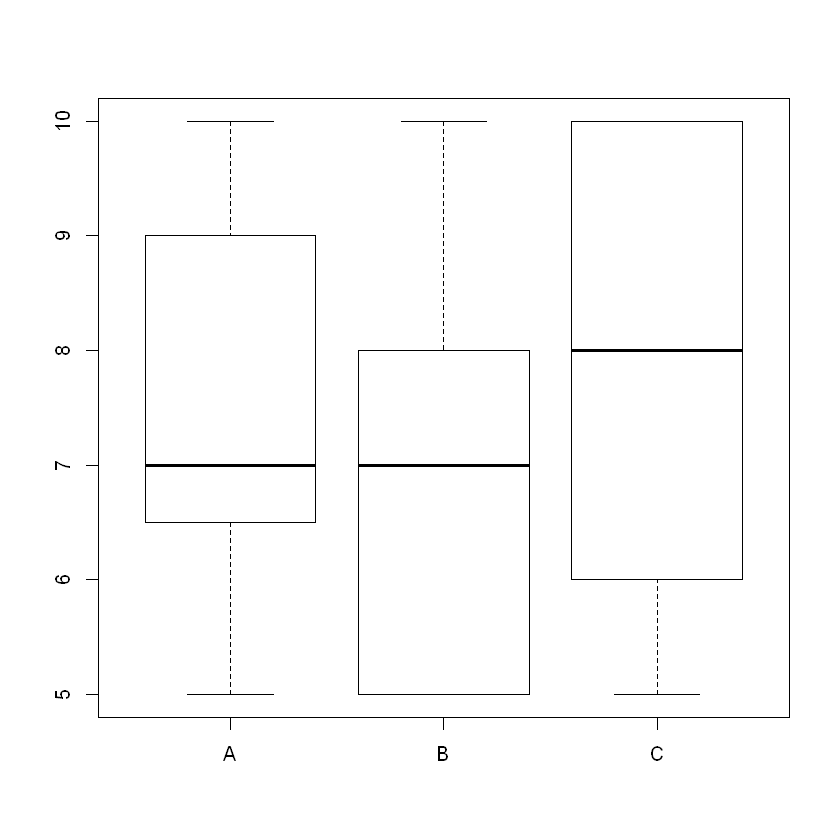

In [12]:
boxplot(tratamento$Horas ~ tratamento$Remedio)

In [13]:
an = aov(Horas ~ Remedio, data=tratamento)

In [14]:
summary(an)

            Df Sum Sq Mean Sq F value Pr(>F)
Remedio      2   4.08   2.042   0.538  0.592
Residuals   21  79.75   3.798               

In [15]:
an = aov(Horas ~ Remedio * Sexo, data=tratamento)
summary(an)

             Df Sum Sq Mean Sq F value Pr(>F)
Remedio       2   4.08   2.042   0.533  0.596
Sexo          1   4.17   4.167   1.087  0.311
Remedio:Sexo  2   6.58   3.292   0.859  0.440
Residuals    18  69.00   3.833               

In [16]:
#teste de tukey
an = aov(Horas ~ Remedio, data=tratamento)
tukey = TukeyHSD(an)
tukey


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Horas ~ Remedio, data = tratamento)

$Remedio
      diff       lwr      upr     p adj
B-A -0.625 -3.080978 1.830978 0.7991405
C-A  0.375 -2.080978 2.830978 0.9218996
C-B  1.000 -1.455978 3.455978 0.5689472


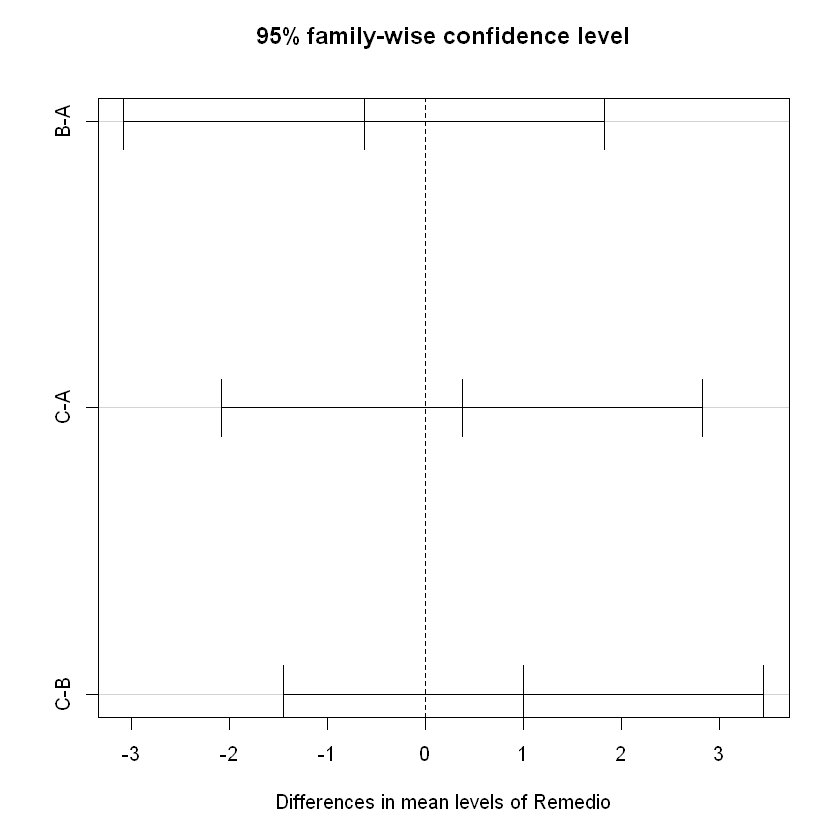

In [17]:
plot(tukey)

## outliers

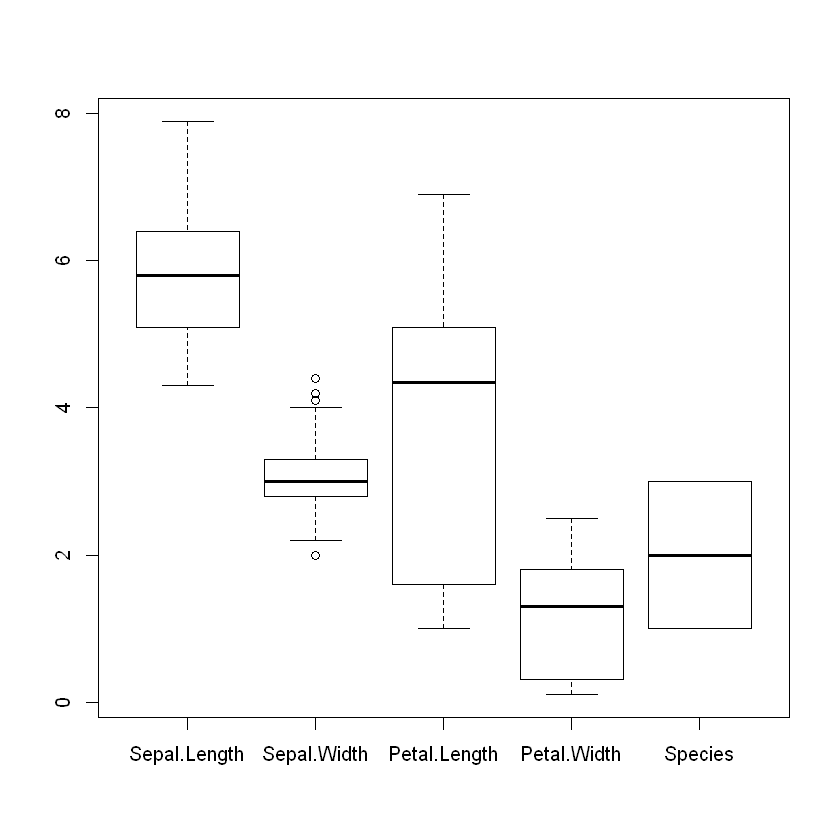

In [18]:
boxplot(iris)

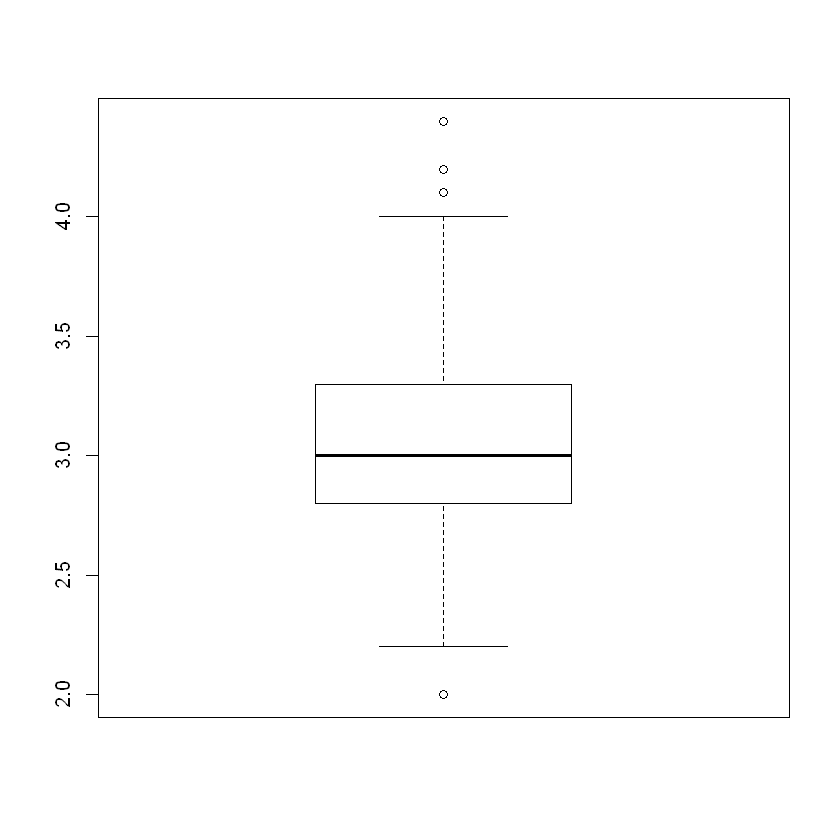

In [19]:
boxplot(iris$Sepal.Width)

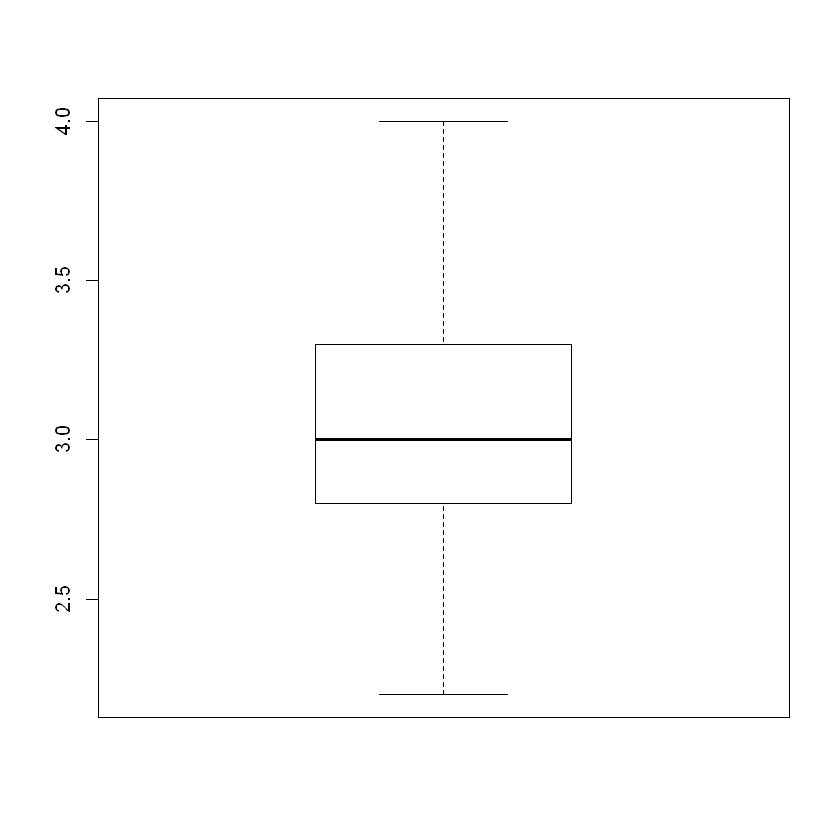

In [20]:
boxplot(iris$Sepal.Width, outline= F)

In [21]:
boxplot.stats(iris$Sepal.Width)$out #mostrar os numeros do outliers

[1] 4.4 4.1 4.2 2.0

In [22]:
install.packages('outliers')
library(outliers)

Installing package into 'C:/Users/dmiyake/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'outliers' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\dmiyake\AppData\Local\Temp\RtmpSwNI61\downloaded_packages


In [24]:
outlier(iris$Sepal.Width) #outliers superior

[1] 4.4

In [25]:
outlier(iris$Sepal.Width, opposite=T) #outliers inferior

[1] 2